# Topic 3: Recommender System

## Business Objective/Problem
- Tiki là một hệ sinh thái thương mại “all in one”, trong
đó có tiki.vn, là một website thương mại điện tử đứng
top 2 của Việt Nam, top 6 khu vực Đông Nam Á.
- Trên trang này đã triển khai nhiều tiện ích hỗ trợ nâng
cao trải nghiệm người dùng và họ muốn xây dựng
nhiều tiện ích hơn nữa.
- Giả sử công ty này chưa triển khai Recommender
System và bạn được yêu cầu triển khai hệ thống này,
bạn sẽ làm gì?
Đ

## Các kiến thức/ kỹ năng cần để giải quyết
vấn đề này:
- Hiểu vấn đề
- Import các thư viện cần thiết và hiểu cách sử dụng
- Đọc dữ liệu (dữ liệu project này được cung cấp)
- Thực hiện EDA cơ bản (sử dụng Pandas Profiling
Report)
- Tiền xử lý dữ liệu: làm sạch, tạo tính năng mới, lựa
chọn tính năng cần thiết…

## Bước 1: Business Understanding
- Dựa vào yêu cầu nói trên => xác định vấn đề:
  - Chưa có hệ thống Recommendation System
  - => Mục tiêu/ vấn đề: Xây dựng Recommendation System
  cho một hoặc một số nhóm hàng hóa trên tiki.vn giúp đề
  xuất và gợi ý cho người dùng/ khách hàng. => Xây dựng
  các mô hình đề xuất:
    - Content-based filtering
    - Collaborative filtering

Bước 2: Data Understanding/ Acquire
- Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ
liệu cần thiết:
  - Dữ liệu được cung cấp sẵn gồm có các tập tin:
  ProductRaw.csv, ReviewRaw.csv chứa thông tin sản phẩm,
  review và rating cho các sản phẩm thuộc các nhóm hàng
  hóa như Mobile_Tablet, TV_Audio, Laptop, Camera,
  Accessory

# Bước 3: Data preparation/ Prepare

### 2. EDA

In [1]:
! pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 4.4 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 4.7 MB 47.3 MB/s 
     |████████████████████████████████| 675 kB 50.9 MB/s 
     |████████████████████████████████| 812 kB 25.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=085028d883c58f85ca493792799a53393e79583532b803d5e4cda9037ca403d4
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=7646cc5fb478e35b3facb4a85e2be8afada09377cfd956c35ff3b19247bc0aa1
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_3'

/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_3


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read data:
products = pd.read_csv('Data/Products.csv')


In [6]:
reviews = pd.read_csv('Data/Reviews.csv',lineterminator='\n')

# 1. Products

In [7]:
products.head(3)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4373 non-null   int64  
 1   name         4373 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4373 non-null   float64
 4   price        4373 non-null   int64  
 5   list_price   4373 non-null   int64  
 6   brand        4373 non-null   object 
 7   group        4373 non-null   object 
 8   url          4373 non-null   object 
 9   image        4373 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.8+ KB


## 1.1 Rating

In [9]:
products[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,4373.0,3.671759,1.796905,0.0,3.8,4.5,4.8,5.0


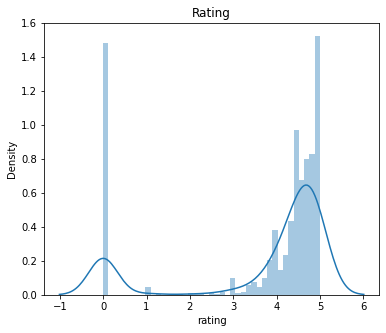

In [10]:
# Visualize Rating
plt.figure(figsize=(6,5))
sns.distplot(products['rating'])
plt.title('Rating')
plt.show()

In [11]:
products['rating'].value_counts()

0.0    790
5.0    593
4.8    442
4.7    427
4.6    361
4.5    326
4.3    233
4.9    220
4.0    204
4.4    191
4.2    125
4.1     77
3.8     61
3.7     54
3.0     52
3.9     49
3.5     40
1.0     24
3.6     23
3.3     17
3.4     15
3.2      9
2.0      7
2.5      7
2.7      6
3.1      5
2.3      4
2.8      4
2.2      2
1.3      2
2.1      1
2.6      1
1.8      1
Name: rating, dtype: int64

In [12]:
# Check some rating = 0
products[products['rating'] == 0].head(3)

,item_id,name,description,rating,price,list_price,brand,group,url,image
29,21017060,"Tai Nghe Bluetooth không dây i12 - TWS, Nhỏ Gọ...",THÔNG TIN CHI TIẾT\nThời gian pin 2-3h\nBlueto...,0.0,79000,580000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-i12-tws-n...,https://salt.tikicdn.com/cache/280x280/ts/prod...
43,67709566,Găng tay chơi game cảm ứng bao ngón tay - Chốn...,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,28000,60000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Chơi Game v...,https://gang-tay-choi-game-cam-ung-bao-ngon-ta...,https://salt.tikicdn.com/cache/280x280/ts/prod...
74,77870921,Giá đỡ điện thoại hình con voi,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,14000,17000,OEM,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,https://gia-do-dien-thoai-hinh-con-voi-p778709...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [13]:
# Check some rating = 5
products[products['rating'] == 5].head(3)

,item_id,name,description,rating,price,list_price,brand,group,url,image
117,11216859,Loa Bluetooth Mini Speaker B2,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nKích thướ...,5.0,40500,78000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-mini-speaker-b2-p1121685...,https://salt.tikicdn.com/cache/280x280/ts/prod...
127,38151960,"Cáp sạc nhanh Micro USB Hoco X14, dây sạc bọc ...",THÔNG TIN CHI TIẾT\nThương hiệu Hoco\nChất liệ...,5.0,44000,100000,Hoco,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,https://cap-sac-nhanh-micro-usb-hoco-x14-day-s...,https://salt.tikicdn.com/cache/280x280/ts/prod...
152,59084364,Loa Máy Tính Game Thủ - ROBOT RS200 - Hàng Chí...,THÔNG TIN CHI TIẾT\nThương hiệu Robot\nXuất xứ...,5.0,199000,900000,Robot,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-may-tinh-game-thu-robot-rs200-hang...,https://salt.tikicdn.com/cache/280x280/ts/prod...


- Rating has a value from 0.0 to 5.0
- The most rating is in the range from 4 to 5
- The number of products with ratings of 0 is highest and next is rating 5. => This is quite absurd because customers rarely rate 0 points => We should check it



In [14]:
reviews['rating'].describe()

count    361090.000000
mean          4.475136
std           1.016672
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

- min of rating in reviews is 1
- => Maybe rating 0 in products are missing value

#### 1.2 Price - List_price

In [15]:
products[['price','list_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,4373.0,2.763501e+06,5.544077e+06,7000.0,150000.0,487000.0,2680000.0,62690000.0
list_price,4373.0,3.893685e+06,7.900791e+06,12000.0,279000.0,790000.0,3590000.0,82990000.0


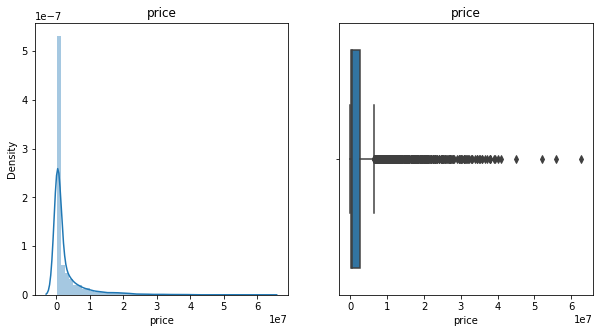

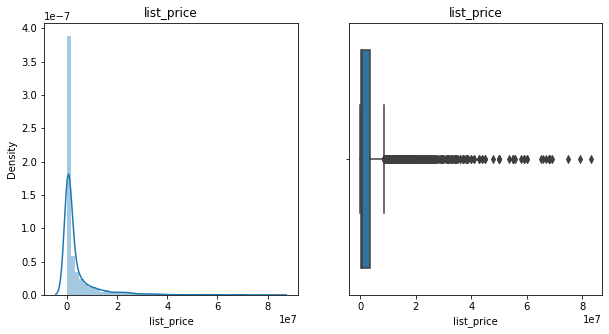

In [16]:
lst = ['price', 'list_price']
for i in lst:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.distplot(products[i])
  plt.title(i)
  plt.subplot(1,2,2)
  sns.boxplot(products[i])
  plt.title(i)
  plt.show()

- The price of the product has a large range (min: 7000, max: 62690000.0)

In [17]:
def xulyngoaile(df,i):
  Q1 = np.percentile(df[i],25)
  Q3 = np.percentile(df[i],75)
  i_IQR = Q3 - Q1
  up = Q3 + i_IQR*1.5
  down = Q1 - i_IQR*1.5
  upoutlier = df[df[i] > up]
  downoutlier = df[df[i] < down]
  return upoutlier,downoutlier

In [18]:
up_price, dow_price  = xulyngoaile(products,'price')
print(f'Upoutlier - Price: {up_price.shape[0]}, Rate: {up_price.shape[0]/products.shape[0]*100:.2f} %')
print(f'Dowoutlier - Price: {dow_price.shape[0]}, Rate: {dow_price.shape[0]/products.shape[0]*100:.2f} %')
up_price.sort_values('price', ascending = False).head(5)

Upoutlier - Price: 564, Rate: 12.90 %
Dowoutlier - Price: 0, Rate: 0.00 %


,item_id,name,description,rating,price,list_price,brand,group,url,image
1936,711323,Máy Ảnh Canon EOS 6D MARK II + Lens Canon 24-1...,THÔNG TIN CHI TIẾT\nThương hiệu Canon\nKích th...,0.0,62690000,68250000,Canon,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh DSLR,https://may-anh-canon-eos-6d-mark-ii-lens-cano...,https://salt.tikicdn.com/cache/280x280/ts/prod...
3232,16964464,Surface Pro 6 Intel Core I7 Ram 16GB SSD 1TB (...,THÔNG TIN CHI TIẾT\nThương hiệu Microsoft\nSKU...,0.0,55880000,58000000,Microsoft,Điện Thoại - Máy Tính Bảng/Máy tính bảng,https://surface-pro-6-intel-core-i7-ram-16gb-s...,https://salt.tikicdn.com/cache/280x280/ts/prod...
3711,57415784,Android Tivi OLED Sony 4K 65 inch KD-65A8H,THÔNG TIN CHI TIẾT\nTổng công suất loa 30W\nSố...,5.0,51990000,74900000,Sony,Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android ...,https://android-tivi-oled-sony-4k-65-inch-kd-6...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1539,1602285,Máy Ảnh Sony Alpha A7 Mark III Body (24.2MP) -...,THÔNG TIN CHI TIẾT\nThương hiệu Sony\nKích thư...,4.3,44990000,49990000,Sony,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh Mirror...,https://may-anh-sony-alpha-a7-mark-iii-body-24...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1987,4432709,Máy Ảnh Canon EOS R Body - Hàng Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu Canon\nKích th...,5.0,40990000,55000000,Canon,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh Mirror...,https://may-anh-canon-eos-r-body-hang-chinh-ha...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [19]:
up_list_price, dow_list_price  = xulyngoaile(products,'list_price')
print(f'Upoutlier - list_Price: {up_list_price.shape[0]}, Rate: {up_price.shape[0]/products.shape[0]*100:.2f} %')
print(f'Dowoutlier - list_Price: {dow_list_price.shape[0]}, Rate: {dow_list_price.shape[0]/products.shape[0]*100:.2f} %')
up_price.sort_values('list_price', ascending = False).head(5)

Upoutlier - list_Price: 582, Rate: 12.90 %
Dowoutlier - list_Price: 0, Rate: 0.00 %


,item_id,name,description,rating,price,list_price,brand,group,url,image
4340,2172089,Smart Tivi OLED LG 4K 65 inch 65C8PTA,THÔNG TIN CHI TIẾT\nTổng công suất loa 40W / 2...,5.0,37979000,82990000,LG,Điện Tử - Điện Lạnh/Tivi/Tivi OLED,https://smart-tivi-oled-lg-4k-65-inch-65c8pta-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
3596,53760828,Smart Tivi The Frame Samsung 4K 65 inch QA65LS...,THÔNG TIN CHI TIẾT\nTổng công suất loa 60W\nSố...,4.9,27990000,79000000,Samsung,Điện Tử - Điện Lạnh/Tivi/Tivi 4K,https://smart-tivi-the-frame-samsung-4k-65-inc...,https://salt.tikicdn.com/cache/280x280/ts/prod...
3711,57415784,Android Tivi OLED Sony 4K 65 inch KD-65A8H,THÔNG TIN CHI TIẾT\nTổng công suất loa 30W\nSố...,5.0,51990000,74900000,Sony,Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android ...,https://android-tivi-oled-sony-4k-65-inch-kd-6...,https://salt.tikicdn.com/cache/280x280/ts/prod...
3950,58545325,Smart Tivi Samsung 4K 82 inch UA82TU8100,THÔNG TIN CHI TIẾT\nTổng công suất loa 20W\nSố...,5.0,37979000,69000000,Samsung,Điện Tử - Điện Lạnh/Tivi/Tivi 4K,https://smart-tivi-samsung-4k-82-inch-ua82tu81...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1936,711323,Máy Ảnh Canon EOS 6D MARK II + Lens Canon 24-1...,THÔNG TIN CHI TIẾT\nThương hiệu Canon\nKích th...,0.0,62690000,68250000,Canon,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh DSLR,https://may-anh-canon-eos-6d-mark-ii-lens-cano...,https://salt.tikicdn.com/cache/280x280/ts/prod...


- With the above products that price is possible => accept oulier

#### 1.3. Brand

In [20]:
products['brand'].unique()

array(['OEM', 'Logitech', 'Acome', 'Apple', 'JBL', 'Xiaomi', 'Hoco',
       'Samsung', 'Baseus', 'Sony', 'QCY', 'TP-Link', 'Robot', 'AMOI',
       'LANITH', 'Sanag', 'Anker', 'SIDOTECH', 'YORN', 'SanDisk',
       'ITelecom', 'Dada', 'Lahutech', 'LG', 'Dell', 'Vinaphone',
       'Viettel', 'Razer', ' GAOMON', 'CAPARIES', 'Aturos', 'vivan',
       ' JBL', 'Orico ', 'HAYLOU', 'Helios', 'SoundPEATS', 'DareU', 'TW',
       'AMA', 'Zealot ', 'AuKey', 'GUTEK', 'Photodesign VN', 'UGREEN',
       'BYZ', 'HXSJ', 'PKCB', 'SADA', 'Microsoft', 'CONVI', 'AION',
       'Mai Lee', 'HiBow', 'ROBINLUX', 'FLYDIGI ', 'Mobifone', 'RAVPower',
       'ICASE', 'Memo', 'Dalugi', 'Microlab', 'Wacom', 'AMAZFIT',
       'Cooler Master', 'Inphic', 'Realme', 'Soundcore by Anker', '\tOEM',
       'Harman Kardon', 'UAG', 'KIOMIC', 'Bosston', 'AKKO', 'Smart Case',
       'E-DRA', 'Tamayoko', 'Fuhlen', 'Handtown', 'Netac', 'Gor',
       'VinBuy', 'CHOETECH', 'I-Telecom', 'Remax', 'Tronsmart', 'V-TECH',
       'Huawei',

In [21]:
print('Number of brand before: ',len(products['brand'].unique()))
products['brand'] = products['brand'].str.upper()
print('Number of brand after: ',len(products['brand'].unique()))

Number of brand before:  521
Number of brand after:  519


In [22]:
products['brand'].value_counts()

OEM          1115
SAMSUNG       199
LG             96
PANASONIC      96
SONY           95
             ... 
SHURE           1
FOCUSRITE       1
BUSHNELL        1
JAGUMAX         1
SHUPU           1
Name: brand, Length: 519, dtype: int64

In [23]:
# Top 10 brand has a high count
brand = pd.DataFrame(products['brand'].value_counts())
brand.head(15)

,brand
OEM,1115
SAMSUNG,199
LG,96
PANASONIC,96
SONY,95
YOOSEE,74
SANDISK,69
APPLE,66
TP-LINK,64
UGREEN,64


In [24]:
products[products['brand'] == 'OEM'].head(2)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...


- OEM stands for the phrase Original Equipment Manufacturer. In short, OEM products are genuine, but machine parts are imported separately from the genuine factory for each part, then construction and installation are carried out. assembled and packed in Vietnam
- => We can ignore the brand = OEM

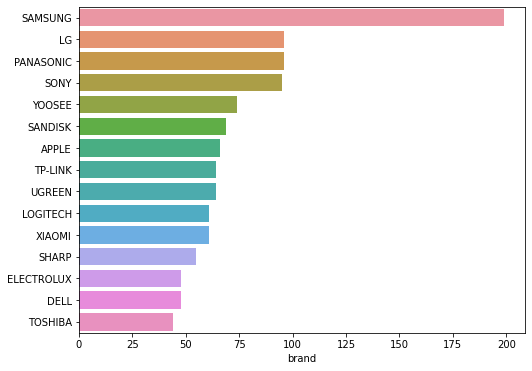

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(y = brand.head(16).tail(15).index, x = brand.head(16).tail(15).brand)
# plt.xticks(rotation = 90)
plt.show()

- SAMSUNG is the brand with the most products, the rest of the other brands are approximately the same

#### Check the Price and Brand

In [26]:
price_brand = products.groupby('brand').mean()[['price']].sort_values('price', ascending = False)
price_brand.head(15)

,price
brand,
HITACHI,2.009200e+07
SURFACE,1.818900e+07
BOSCH,1.792620e+07
BLACK SHARK,1.729000e+07
APPLE,1.712268e+07
ACER,1.541900e+07
SIGMA,1.359667e+07
ARBER,1.335000e+07
MITSUBISHI,1.319950e+07


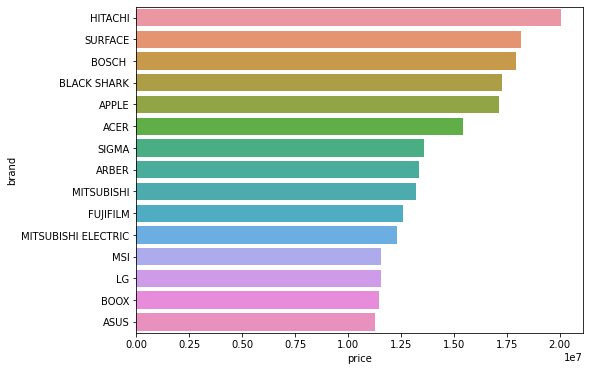

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(y = price_brand.head(15).index, x = price_brand.head(15).price)
# plt.xticks(rotation = 90)
plt.show()

- The mean price of HITACHI is highest, the next is SURFACE and BOSCH

## 2. Reviews

In [28]:
reviews.head()

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361090 entries, 0 to 361089
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  361090 non-null  int64 
 1   product_id   361090 non-null  int64 
 2   name         360662 non-null  object
 3   rating       361090 non-null  int64 
 4   title        361062 non-null  object
 5   content      165053 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.5+ MB


#### 2.1. Rating

In [30]:
reviews['rating'].unique()

array([3, 5, 4, 2, 1])

   rating    percent
5  256211  70.954887
4   60565  16.772827
3   20600   5.704949
1   16616   4.601623
2    7098   1.965715


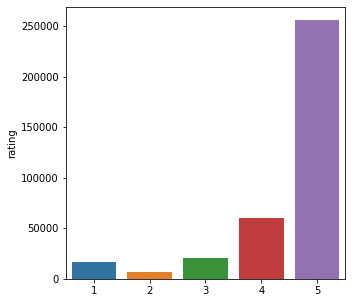

In [31]:
table = pd.DataFrame(reviews['rating'].value_counts())
table['percent'] = table['rating']/table['rating'].sum()*100
print(table)
plt.figure(figsize = (5,5))
sns.barplot(table.index,table['rating'])
# plt.xticks(rotation = 90)
plt.show()

- The most of rating is 5 (70.9%)

#### 2.2 Product_id

          product_id   percent
299461          4715  1.305769
1600005         2629  0.728073
47321729        2419  0.669916
405243          2316  0.641391
8141868         2202  0.609820
389145          2077  0.575203
487511          2057  0.569664
547563          2006  0.555540
591960          1962  0.543355
43107185        1933  0.535324
7820533         1922  0.532277
4897521         1832  0.507353
54017350        1817  0.503199
356188          1796  0.497383
2638665         1683  0.466089


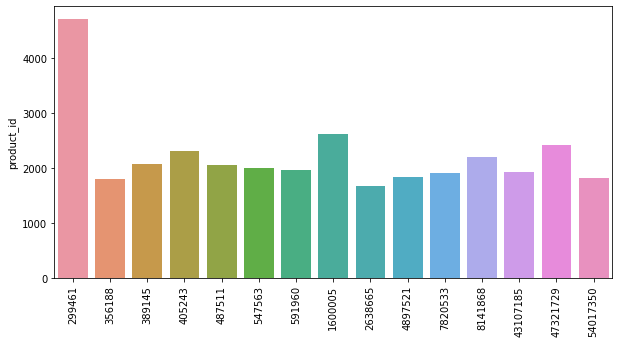

In [32]:
# Check 15 product_id most reviewed
table = pd.DataFrame(reviews['product_id'].value_counts(ascending = False))
table['percent'] = table['product_id']/table['product_id'].sum()*100
# table.index = products[products.item_id.isin(table.index)]['name'].str[:25]
print(table.head(15))
plt.figure(figsize = (10,5))
sns.barplot(table.head(15).index,table.head(15)['product_id'])
plt.xticks(rotation = 90)
plt.show()

In [33]:
table.head().index

Int64Index([299461, 1600005, 47321729, 405243, 8141868], dtype='int64')

product_id = 299461 is the most reviewed. Make a check about it

In [34]:
reviews[reviews['product_id'] == 299461]

,customer_id,product_id,name,rating,title,content
107332,9066904,299461,Việt Anh,3,Đã nhận hàng. Giao nhanh hơn dự kiến,Nhận hàng nhưng k rõ là tại sao chuột đã bị kh...
107333,6210773,299461,Q Tú,2,"Hàng không rõ ràng, đề nghị Tiki giải thích.",Mua hàng là Logitech M331 Silent Plus ( theo m...
107334,137665,299461,Đỗ Thảo,5,Cực kì hài lòng,Thấy các bạn chê nhiều chứ mình thì thấy mọi t...
107335,1694268,299461,Lê Quốc Duy,5,Đáng mua,Một số đánh giá của mình sau khi mua:- Giao hà...
107336,8580294,299461,Tiêu Anh,5,Cực kì hài lòng,"Hàng còn nguyên seal, không bị bóc ra để dán t..."
...,...,...,...,...,...,...
112042,18390607,299461,La Thanh Huy,5,Cực kì hài lòng,NaN
112043,6005474,299461,Man Xuan Hoat,5,Cực kì hài lòng,ok
112044,1090197,299461,Ngọc Hùng,5,Cực kì hài lòng,NaN
112045,8899975,299461,Trương Quốc Thịnh,3,Bình thường,hư con lăn sau 5 tháng sử dụng


In [35]:
products[products['item_id'] == 299461]

,item_id,name,description,rating,price,list_price,brand,group,url,image
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,LOGITECH,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...


In [36]:
products[products['item_id'] == 299461].name.unique()

array(['Chuột Không Dây Logitech M331 Silent - Hàng Chính Hãng'],
      dtype=object)

- product name:'Chuột Không Dây Logitech M331 Silent - Hàng Chính Hãng' (product_id 299461) is the product that is most reviewed (4715 reviews)

#### 2.3. Customer_id

          customer_id   percent
7737978            50  0.013847
7280719            40  0.011078
6106142            37  0.010247
7377207            35  0.009693
1064154            34  0.009416
1425077            32  0.008862
1046981            31  0.008585
6177374            30  0.008308
6844844            29  0.008031
7556842            28  0.007754
717732             28  0.007754
10371235           28  0.007754
11575918           27  0.007477
151415             27  0.007477
7665225            27  0.007477


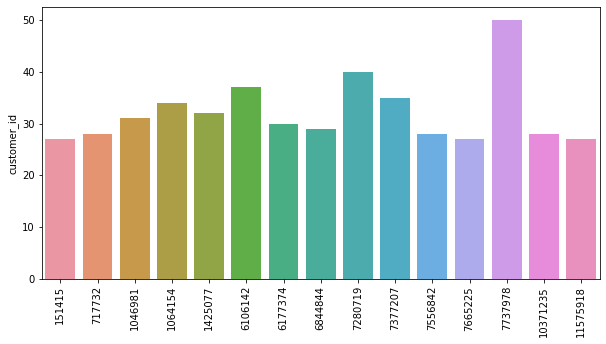

In [37]:
# Check 15 customer_id most reviewed
table = pd.DataFrame(reviews['customer_id'].value_counts(ascending = False))
table['percent'] = table['customer_id']/table['customer_id'].sum()*100
print(table.head(15))
plt.figure(figsize = (10,5))
sns.barplot(table.head(15).index,table.head(15)['customer_id'])
plt.xticks(rotation = 90)
plt.show()

- customer_id = 7737978 is the customer_id that have most review.


In [38]:
reviews[reviews['customer_id'] == 7737978].head()

,customer_id,product_id,name,rating,title,content
7222,7737978,10683352,Đỗ Thanh Hy,5,Cực kì hài lòng,NaN
18532,7737978,12090644,Đỗ Thanh Hy,5,Cực kì hài lòng,NaN
23678,7737978,12716267,Đỗ Thanh Hy,5,Cực kì hài lòng,NaN
38253,7737978,15183957,Đỗ Thanh Hy,5,Cực kì hài lòng,NaN
41421,7737978,15514958,Đỗ Thanh Hy,5,Cực kì hài lòng,NaN
